In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rc('text', usetex=True)

In [10]:
# Constants (currently set for Earth vals)

Tinit = 10 # C
Tvar = 12 # C
Tbottom = 11 # C

# Diffusion constant (https://www.nature.com/articles/nature07818)
alpha = 0.0864 # m^2 / day

# times 
tyear = 365 # d
ti = 0 # d
tf = 10*tyear # d
dt = 1 # d

# Depth and width
D = 20 # m
Nd = 50
W = 4e6 # m
Nw = 100
ad = D/Nd
aw = W/Nw

In [15]:
def show_plot(crust, t):
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    im = ax.imshow(crust, vmin=0, vmax=20)
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('$\mathrm{Temperature\ [K]}$', rotation=270, labelpad=15)
    ax.set_title('$\mathrm{t = %i\ days}$'%t)
    ax.set_xlabel('$\mathrm{Width}$')
    ax.set_ylabel('$\mathrm{Depth}$')
    plt.draw()
    plt.pause(0.0001)
    plt.clf()

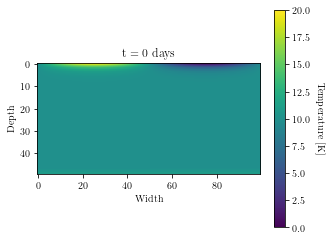

<Figure size 432x288 with 0 Axes>

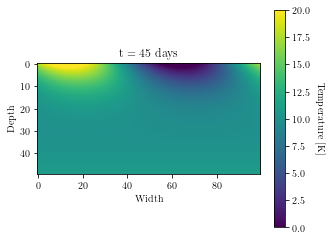

<Figure size 432x288 with 0 Axes>

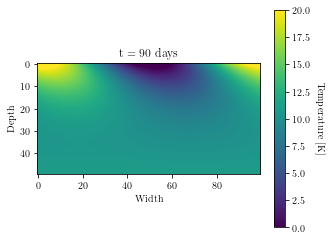

<Figure size 432x288 with 0 Axes>

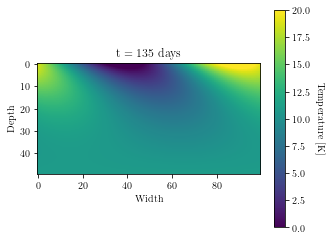

<Figure size 432x288 with 0 Axes>

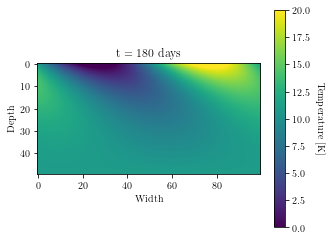

<Figure size 432x288 with 0 Axes>

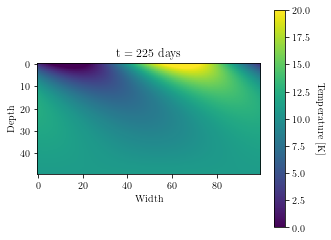

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

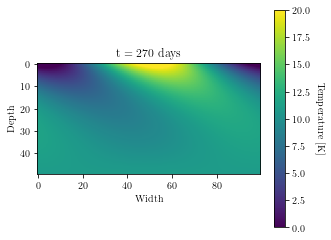

In [16]:
# Initialize "crust": 2D array of T = Tinit except at bottom
crust = np.full((Nd,Nw), Tinit, dtype='float')
crust[Nd-1] = Tbottom

for t in np.arange(ti, tf+dt, dt):
    
    # periodic heating at surface with phase shift (INCORRECT ON SUB-DAY TIMESCALE)
    phase = np.arange(Nw)/Nw
    crust[0] = Tinit + Tvar*np.sin(2*np.pi*(t/tyear+phase))
    
    # depth (skipping top and bottom to maintain boundaries)
    for i in range(1, Nd-1):
        # width (periodic boundary connecting 0 to Nw)
        for j in range(0, Nw):
            # evolve crust with FTCS approach! (in 2D)
            
            if j == Nw-1: # to avoid overflow at crust[i,j+1]
                crust[i,j] = crust[i,j] + dt*alpha*(
                    (crust[i+1,j] + crust[i-1,j] - 2*crust[i,j])/ad**2 + 
                    (crust[i,0] + crust[i,j-1] - 2*crust[i,j])/aw**2)
            else:
                crust[i,j] = crust[i,j] + dt*alpha*(
                    (crust[i+1,j] + crust[i-1,j] - 2*crust[i,j])/ad**2 + 
                    (crust[i,j+1] + crust[i,j-1] - 2*crust[i,j])/aw**2)
    
    # Show plot
    if t%(tyear//8) == 0:
        show_plot(crust, t)
        #plt.show()
